# __<div align="center">EDP : TP2 - Intégration temporelle</div>__

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### __1. Schéma d'Euler explicite__

#### __1.1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d'Euler explicite__

In [10]:
def FOUEE_u_i_nplus1(rien, u_i_n, u_imoinsun_n, rien2, C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

def UPO2VF_EE_u_i_nplus1(u_iplusun_n, u_i_n, u_imoinsun_n, u_imoinsdeux_n, C):
    return u_i_n - (C/4)*(u_iplusun_n + 3*u_i_n - 5*u_imoinsun_n + u_imoinsdeux_n)

#### __1.2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schémas ?__

In [3]:
C_liste = [0.1, 0.5, 1]

In [4]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m

a = 1       # a = 1m/s

T = 1
deltax = L/m

deltaT_liste = [C_liste[i]*deltax/a for i in range(len(C_liste))]
p_liste = [int(T/deltaT_liste[i]) for i in range(len(deltaT_liste))]

abscisse = np.linspace(0,L,m)


def CI(x,x0):
    return x > x0

u0 = np.vectorize(CI)(abscisse,x0)

##### __1.2.1. FOU__

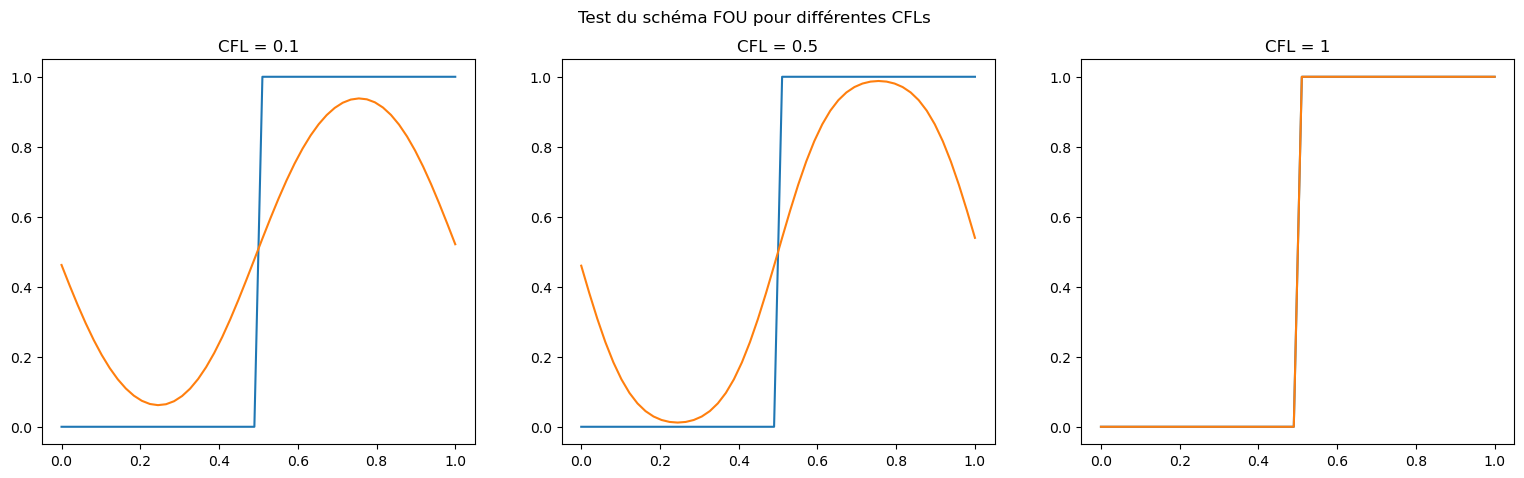

In [69]:
plt.figure(figsize=(19, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_FOUEE = np.zeros((m,p_liste[k] + 1))
    grille_temps_espace_FOUEE[:,0] = u0
    for n in range(1,p_liste[k] + 1) :
        for i in range(m) :
            grille_temps_espace_FOUEE[i,n] = FOUEE_u_i_nplus1(None, grille_temps_espace_FOUEE[i,n - 1], grille_temps_espace_FOUEE[i - 1,n - 1], None, C_liste[k])

    plt.suptitle("Test du schéma FOU pour différentes CFLs")
    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,0])

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,-1])

    plt.title("CFL = " + str(C_liste[k]))

##### __1.2.2. UPO2VF__

In [ ]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_UPO2VF = np.zeros((m,p_liste[k]))
    grille_temps_espace_UPO2VF[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_UPO2VF[i,n] = UPO2VF_EE_u_i_nplus1(grille_temps_espace_UPO2VF[(i + 1)%m,n - 1], grille_temps_espace_UPO2VF[i,n - 1], grille_temps_espace_UPO2VF[i - 1,n - 1], grille_temps_espace_UPO2VF[i - 2,n - 1], C_liste[k])

    plt.suptitle("Test du schéma UPO2VF pour différentes CFLs")
    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,0])

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,-1])

    plt.title("CFL = " + str(C_liste[k]))

### __2. Schéma de Runge Kutta explicite d'ordre 2__

In [ ]:
""" def RKexpl2_deltaU_etoile(u_n, C, schema):
    #deltaU_etoile_n = np.zeros(len(u_n))
    deltaU_etoile_n = []
    for i in range(len(u_n)) :
        #deltaU_etoile_n[i] = u_n[i] - (C/4)*(u_n[(i+1)%len(u_n)] + 3*u_n[i] - 5*u_n[i - 1] + u_n[i - 2])
        #deltaU_etoile_n[i] = schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C)
        deltaU_etoile_n.append(schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C))
    return np.array(deltaU_etoile_n)

# -> Fonctionnement verifié

def RKexpl2_U_etoile(u_n, dt, C, schema):
    return u_n + dt*RKexpl2_deltaU_etoile(u_n, C, schema)
    #return np.array(u_n) + dt*RKexpl2_deltaU_etoile(u_n, C, schema)

def RKexpl2_deltaU(u_n, dt, C, schema):
    #deltaU_n = np.zeros(len(u_n))
    deltaU_n = []

    #for i in range(len(u_n)) :
        #deltaU_n[1,i] = UPO2VF_EE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    
    
    #deltaU_n = (1/2)*RKexpl2_deltaU_etoile(RKexpl2_U_etoile(u_n, dt, C), C) + (1/2)*RKexpl2_deltaU_etoile(u_n, C)
    
    
    #deltaU_n[1,i] = FOUEE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    
    U_etoile = RKexpl2_U_etoile(u_n, dt, C, schema)
    
    for i in range(len(u_n)) :
        #deltaU_n[i] = (1/2)*schema(U_etoile[(i+1)%len(U_etoile)], U_etoile[i], U_etoile[i - 1], U_etoile[i - 2], C) + (1/2)*schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C)
        deltaU_n.append((1/2)*schema(U_etoile[(i+1)%len(U_etoile)], U_etoile[i], U_etoile[i - 1], U_etoile[i - 2], C) + (1/2)*schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C))
    #return np.array(deltaU_n)
    return deltaU_n


def RKexpl2_U_nplusun(u_n, dt, C, schema):
    #return u_n + dt*RKexpl2_deltaU(u_n, dt, C, schema)
    return [u_n[i] + dt*RKexpl2_deltaU(u_n, dt, C, schema)[i] for i in range(len(u_n))]


plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :

        # CHOISIR LE SCHEMA EN REMPLACANT LE DERNIER ARGUMENT CI-DESSOUS
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_U_nplusun(grille_temps_espace_RKexpl2[:,n-1], deltaT_liste[k], C_liste[k], FOUEE_u_i_nplus1)

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])
"""

In [87]:
def du_FOU(rien, u_i, uimoinsun, rien2):
    return -(a/deltax)*(u_i - uimoinsun)

def du_UPO2VF(u_iplusun, u_i, u_imoinsun, u_imoinsdeux):
    return -(a/(4*deltax))*(u_iplusun + 3*u_i - 5*u_imoinsun + u_imoinsdeux)

In [88]:
def RKexpl2_schema(U_n, schema, dt):
    U_etoile = np.zeros(np.size(U_n,0))
    for i in range(np.size(U_n,0)) :
        dU_etoile = schema(U_n[(i + 1)%np.size(U_n,0)], U_n[i], U_n[i - 1], U_n[i - 2])
        U_etoile[i] = U_n[i] + dt*dU_etoile
    U_nplusun = np.zeros(np.size(U_n,0))
    for i in range(np.size(U_n,0)) :
        dU = 0.5*schema(U_n[(i + 1)%np.size(U_n,0)], U_etoile[i], U_etoile[i - 1], U_n[i - 2]) + 0.5*schema(U_n[(i + 1)%np.size(U_n,0)], U_n[i], U_n[i - 1], U_n[i - 2])
        U_nplusun[i] = U_n[i] + dt*dU
    return U_nplusun

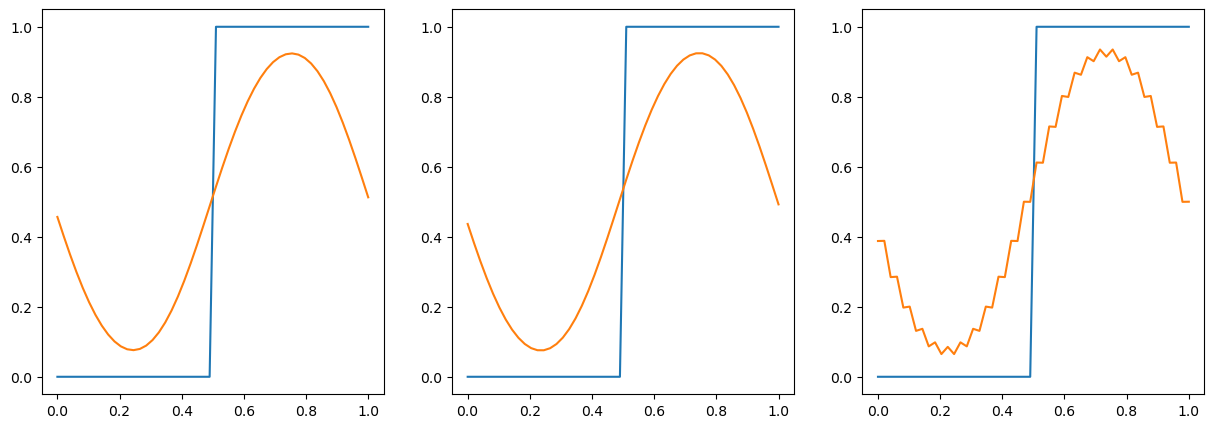

In [89]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_schema(grille_temps_espace_RKexpl2[:,n-1], du_FOU, deltaT_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

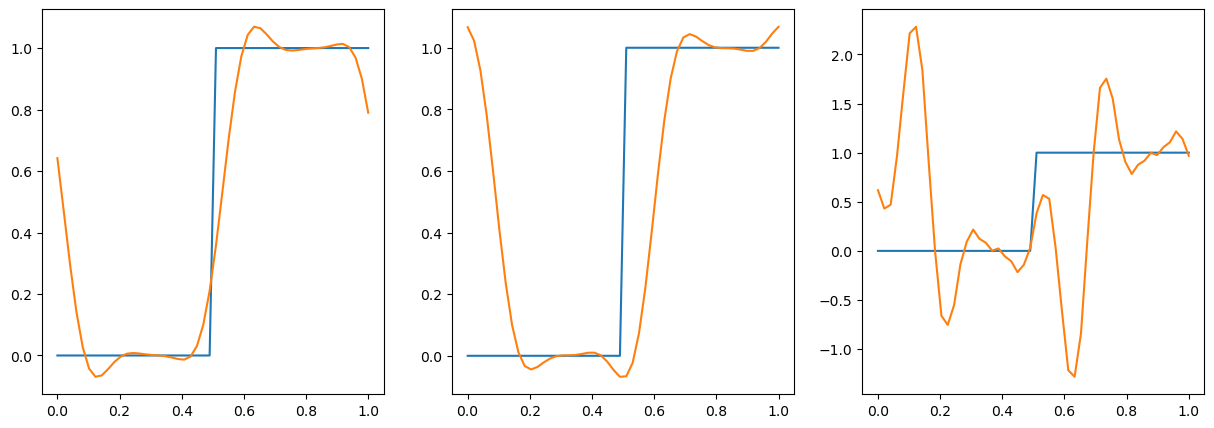

In [121]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k] - 1))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k] - 1) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_schema(grille_temps_espace_RKexpl2[:,n-1], du_UPO2VF, deltaT_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

In [114]:
def RK2expl_UPO2VF2(U_0, C):
    dt = (C*deltax)/a
    grille = np.zeros((np.size(U_0,0),int(T/dt) + 1))
    grille[:,0] = U_0
    for n in range(1,int(T/dt) + 1) :
        U_etoile = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)):
            U_etoile[i] = grille[i,n-1] - (C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1])
        for i in range(np.size(U_0,0)):
            grille[i,n] = grille[i,n-1] - (0.5)*(C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1]) + (0.5)*(C/4)*(U_etoile[(i+1)%np.size(U_0,0)] + 3*U_etoile[i] - 5*U_etoile[i-1] + U_etoile[i-2])
    return grille

In [95]:
def RK2expl_UPO2VF(U_0, C, dt):
    grille = np.zeros((np.size(U_0,0),int(T/dt)))
    #grille[:,0] = np.array(u0)
    grille[:,0] = U_0
    for n in range(1,int(T/dt)) :
        #dU_etoile = du_FOU(C, rien, u_i, uimoinsun, rien2)
        U_etoile = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU_etoile = -C*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1])
            U_etoile[i] = grille[i,n-1] + dt*dU_etoile
        U_nplusun = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU = (-0.5)*C*(U_etoile[(i+1)%np.size(U_0,0)] + 3*U_etoile[i] - 5*U_etoile[i-1] + U_etoile[i-2]) - (0.5)*C*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1])
            U_nplusun[i] = grille[i,n-1] + dt*dU
        grille[:,n] = U_nplusun
    return grille

In [82]:
print(deltaT_liste[0])

0.002


50


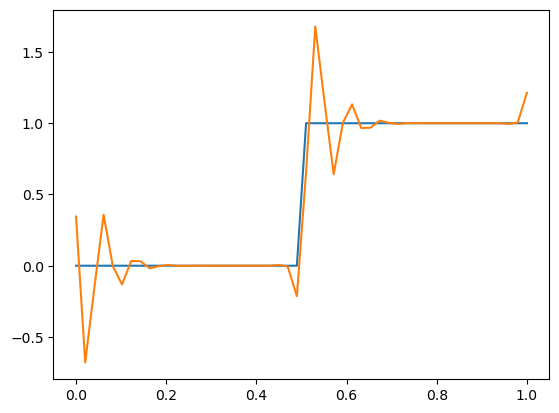

In [118]:
U_0 = np.array(u0)

grille_FOURK = RK2expl_UPO2VF2(U_0, 0.02)

plt.plot(abscisse, grille_FOURK[:,0])
plt.plot(abscisse, grille_FOURK[:,-1])

print(np.size(U_0,0))

In [11]:
def RK2expl_UPO2VFRK(U_0, C, dt):
    grille = np.zeros((np.size(U_0,0),int(T/dt)))
    #grille[:,0] = np.array(u0)
    grille[:,0] = U_0
    for n in range(1,int(T/dt)) :
        #dU_etoile = du_FOU(C, rien, u_i, uimoinsun, rien2)
        U_etoile = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU_etoile = -(C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + 2*grille[i-2,n-1])
            U_etoile[i] = grille[i,n-1] + dt*dU_etoile
        U_nplusun = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU = -0.5*(C/4)*(U_etoile[(i+1)%np.size(U_0,0)] + 3*U_etoile[i] - 5*U_etoile[i-1] + 2*U_etoile[i-2]) - 0.5*(C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + 2*grille[i-2,n-1])
            U_nplusun[i] = grille[i,n-1] + dt*dU
        grille[:,n] = U_nplusun
    return grille

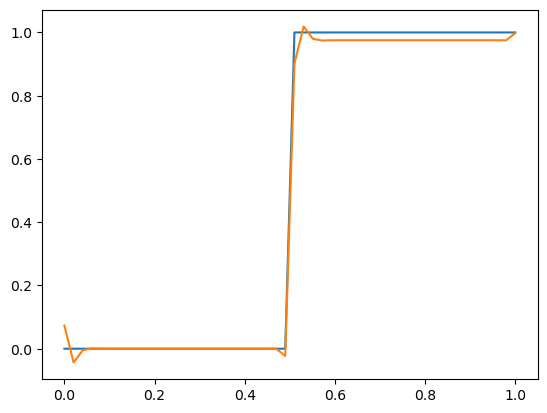

In [23]:
grille_UPO2VFRK = RK2expl_UPO2VFRK(U_0, C_liste[0], deltaT_liste[0])

plt.plot(abscisse, grille_UPO2VFRK[:,0])
plt.plot(abscisse, grille_UPO2VFRK[:,-1])

### __3. Schéma d'Euler implicite__

In [ ]:
def Eulerimp_deltaU(u_nplusun, C, schema):
    return np.array(schema(u_nplusun[(i+1)%len(u_nplusun)], u_nplusun[i], u_nplusun[i - 1], u_nplusun[i - 2], C))

def Eulerimp_U_nplusun(u_n, deltaU, dt, C, schema):
    return np.array(u_n + dt*deltaU)